# **Análisis exploratorio del dataframe 2**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df2=pd.read_csv("df2_FGJ_CarpetasLibertad.csv", encoding='utf-8')
print(df2.shape)
print("-----------------------------------")

#Fechas a datetime:
df2['fecha_inicio'] = pd.to_datetime(df2['fecha_inicio'], format='mixed', errors='coerce')
df2['fecha_hecho'] = pd.to_datetime(df2['fecha_hecho'], format='mixed', errors='coerce')

#Año del hecho a int:
df2['anio_hecho'] = df2['anio_hecho'].astype('Int64') #Conservando los NaT

#Creación de una columna con el mes del hecho:
df2['mes_hecho']= df2['fecha_hecho'].dt.month.astype('Int64')
asignacion={
    1: 'Enero',
    2: 'Febrero',
    3: 'Marzo',
    4: 'Abril',
    5: 'Mayo',
    6: 'Junio',
    7: 'Julio',
    8: 'Agosto',
    9: 'Septiembre',
    10: 'Octubre',
    11: 'Noviembre',
    12: 'Diciembre'}

df2['mes_hecho']=df2['mes_hecho'].map(asignacion)
print(df2.dtypes)
print("-----------------------------------")
display(df2.head(3))
print("-----------------------------------")
print(df2.isna().sum())
print("-----------------------------------")
print(df2.columns)
print("-----------------------------------")
print(pd.unique(df2['delito']))
print("-----------------------------------")
print(pd.unique(df2['categoria_delito']))

(6660, 13)
-----------------------------------
anio_inicio                      int64
mes_inicio                      object
fecha_inicio            datetime64[ns]
fecha_hecho             datetime64[ns]
hora_hecho                      object
delito                          object
categoria_delito                object
fiscalia                        object
agencia                         object
unidad_investigacion            object
colonia_catalogo                object
alcaldia_hecho                  object
anio_hecho                       Int64
mes_hecho                       object
dtype: object
-----------------------------------


anio_inicio mes_inicio fecha_inicio fecha_hecho hora_hecho  \
0         2024     Agosto   2024-08-31  1975-01-30   06:00:00   
1         2023      Enero   2023-01-20  1995-10-01   16:30:00   
2         2022      Abril   2022-04-11  1997-07-21   08:00:00   

                              delito        categoria_delito  \
0  PRIVACION DE LA LIBERTAD PERSONAL  DELITO DE BAJO IMPACTO   
1  PRIVACION DE LA LIBERTAD PERSONAL  DELITO DE BAJO IMPACTO   
2  PRIVACION DE LA LIBERTAD PERSONAL  DELITO DE BAJO IMPACTO   

                                            fiscalia   agencia  \
0  FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN ALVAR...  UAT-AO-4   
1  FISCALÍA DE INVESTIGACIÓN Y PERSECUCIÓN DE LOS...         B   
2  FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN MIGUE...  UAT-MH-1   

  unidad_investigacion                 colonia_catalogo  alcaldia_hecho  \
0               UI-1SD                        San Angel  ALVARO OBREGON   
1       2 SIN DETENIDO  Bosque De Chapultepec I Seccion  MIGUEL HIDALGO   
2               UI-1SD                      Santo Tomas  MIGUEL HIDALGO   

   anio_hecho mes_hecho  
0        1975     Enero  
1        1995   Octubre  
2        1997     Julio

-----------------------------------
anio_inicio               0
mes_inicio                0
fecha_inicio              1
fecha_hecho               5
hora_hecho                4
delito                    0
categoria_delito          0
fiscalia                  1
agencia                   0
unidad_investigacion      2
colonia_catalogo        532
alcaldia_hecho            0
anio_hecho                5
mes_hecho                 5
dtype: int64
-----------------------------------
Index(['anio_inicio', 'mes_inicio', 'fecha_inicio', 'fecha_hecho',
       'hora_hecho', 'delito', 'categoria_delito', 'fiscalia', 'agencia',
       'unidad_investigacion', 'colonia_catalogo', 'alcaldia_hecho',
       'anio_hecho', 'mes_hecho'],
      dtype='object')
-----------------------------------
['PRIVACION DE LA LIBERTAD PERSONAL' 'DESAPARICION FORZADA DE PERSONAS'
 'SECUESTRO EXPRESS (PARA COMETER ROBO O EXTORSIÓN)' 'PLAGIO O SECUESTRO'
 'TRAFICO DE INFANTES'
 'PRIVACION DE LA LIBERTAD PERSONAL (REALIZAR ACTO 

# **1. Distribución de frecuencia de las subclasificaciones del delito hacia la libertad personal de acuerdo a la fecha de apertura de las carpetas de investigación**

Se visualizará la distribución del número de carpetas asociadas al delito sobre el bien jurídico de la libertad personal, de acuerdo a las distintas subclasificaciones legales que le son asignadas. Los registros corresponden a carpetas que fueron abiertas entre enero 2016  y enero 2025.

Nota: En este notebook cada que se mencione el concepto de *delito(s)*, se hace referencia únicamente a los asociados a la libertad personal, pues son el objetivo del análisis.

In [2]:
print(df2['delito'].value_counts())

delito
PRIVACION DE LA LIBERTAD PERSONAL                                     5301
SECUESTRO EXPRESS (PARA COMETER ROBO O EXTORSIÓN)                      922
PLAGIO O SECUESTRO                                                     227
DESAPARICION FORZADA DE PERSONAS                                       120
PRIVACION DE LA LIBERTAD PERSONAL (REALIZAR ACTO SEXUAL)                57
TRAFICO DE INFANTES                                                     19
SECUESTRO EXTORSIVO                                                     11
PRIVACIÓN DE LA LIBERTAD PERSONAL  ( SI LIBERA DENTRO DE 24 HORAS)       2
SECUESTRO                                                                1
Name: count, dtype: int64


In [3]:
#Clasificando el único dato de secuestro dentro de la categoría plagio o secuestro:
df2.loc[df2['delito'] == 'SECUESTRO', 'delito'] = 'PLAGIO O SECUESTRO'

total_denuncias_por_delito=df2['delito'].value_counts()
print(f'El número total de denuncias registradas por tipo de delito contra la libertad personal, de enero 2016 a enero 2025 es: \n \n {total_denuncias_por_delito}')

El número total de denuncias registradas por tipo de delito contra la libertad personal, de enero 2016 a enero 2025 es: 
 
 delito
PRIVACION DE LA LIBERTAD PERSONAL                                     5301
SECUESTRO EXPRESS (PARA COMETER ROBO O EXTORSIÓN)                      922
PLAGIO O SECUESTRO                                                     228
DESAPARICION FORZADA DE PERSONAS                                       120
PRIVACION DE LA LIBERTAD PERSONAL (REALIZAR ACTO SEXUAL)                57
TRAFICO DE INFANTES                                                     19
SECUESTRO EXTORSIVO                                                     11
PRIVACIÓN DE LA LIBERTAD PERSONAL  ( SI LIBERA DENTRO DE 24 HORAS)       2
Name: count, dtype: int64


Fecha de apertura de carpeta más antigua: 2016-01-03 00:00:00
Fecha de apertura de carpeta más reciente: 2025-01-31 19:26:42
-----------------------------------


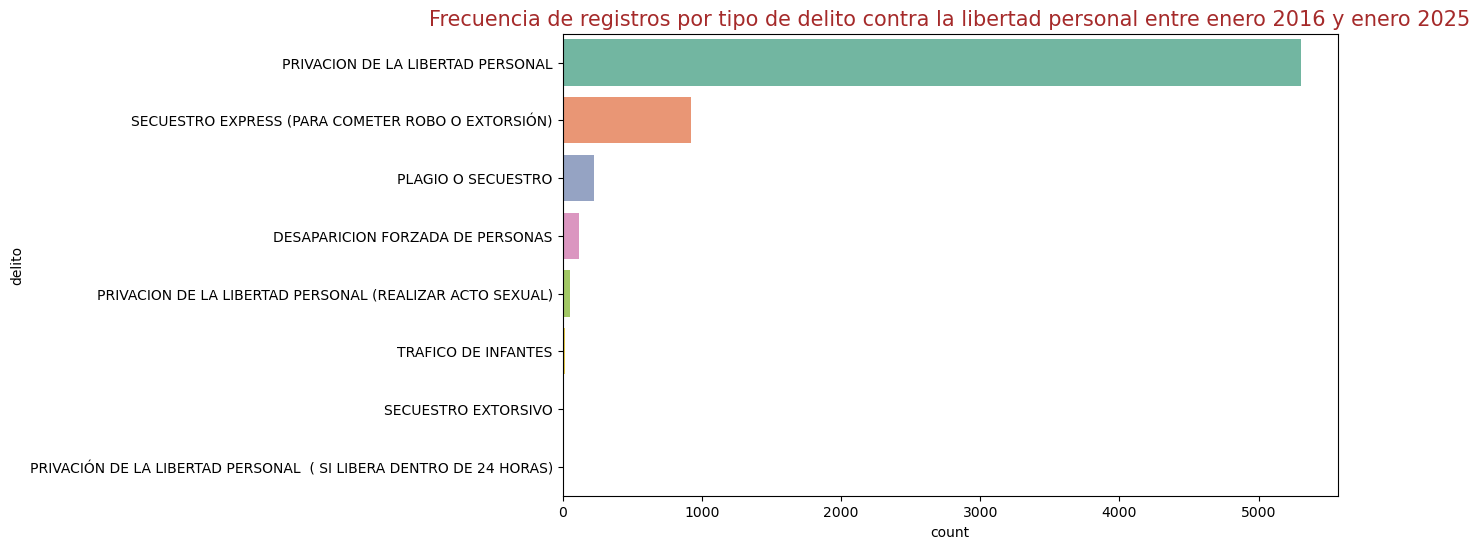

In [4]:
import warnings
warnings.filterwarnings('ignore')

print(f'Fecha de apertura de carpeta más antigua: {df2['fecha_inicio'].min()}')
print(f'Fecha de apertura de carpeta más reciente: {df2['fecha_inicio'].max()}')
print("-----------------------------------")

plt.figure(figsize=(10, 6))
sns.countplot(y='delito', data=df2, order=df2['delito'].value_counts().index, palette='Set2')
plt.title('Frecuencia de registros por tipo de delito contra la libertad personal entre enero 2016 y enero 2025', color='brown', fontsize=15)
plt.show()

In [5]:
#print(df2.groupby("anio_hecho")["delito"].count())
#print(df2.groupby("mes_hecho")["delito"].count())


# **2. Distribución de la frecuencia del delito hacia la libertad personal a lo largo del tiempo para detectar patrones**

Se presentará una visualización de frecuencia del delito contra la libertad personal en términos temporales, de acuerdo a tres variables: el año del hecho, el mes del hecho y el número de registros.

La visualización consiste en lo siguiente:

Se busca implementar un algoritmo K-means para detectar patrones temporales, pues un método de clustering precisamente nos ayudaría a agrupar datos con perfiles temporales que poseen alguna similitud entre sí. Se aplicará el K-means sobre una matriz asociada a un mapa de calor.

Sobre el mapa de calor:

Se abordará a partir de una tabla de pivote, el multi-index asociado es la columna 'anio_hecho'. Primero se trabajará una tabla general con todos los datos de la fecha de hecho, para después evaluar posibles valores capaces de sesgar el clustering.

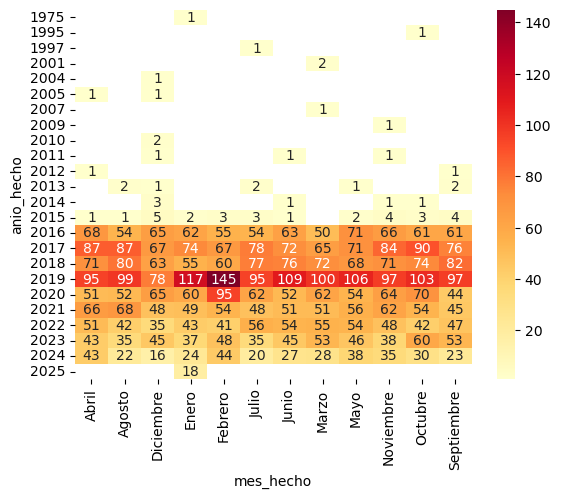

In [6]:
#Tabla pivote general:
multindex_año=df2.pivot_table(index="anio_hecho", columns="mes_hecho", values="delito", aggfunc="count")
sns.heatmap(multindex_año, annot=True, fmt=".0f", cmap="YlOrRd")
plt.show()

In [7]:
#Se abordarán únicamente columnas entre 2026 y 2024, los escasos valores mensuales entre los demás años pueden sesgar el agrupamiento:
df2_16_24=df2[(df2['anio_hecho'] >= 2016) & (df2['anio_hecho'] <= 2024)]
display(df2_16_24.head(2))
print("-----------------------------------")
print(df2_16_24.shape)

pivote_clus=df2_16_24.pivot_table(index="anio_hecho", columns="mes_hecho", values="delito", aggfunc="count")

anio_inicio mes_inicio fecha_inicio fecha_hecho hora_hecho  \
60         2016      Enero   2016-01-03  2016-01-02   05:00:00   
61         2016      Enero   2016-01-04  2016-01-03   00:30:00   

                               delito        categoria_delito  \
60  PRIVACION DE LA LIBERTAD PERSONAL  DELITO DE BAJO IMPACTO   
61  PRIVACION DE LA LIBERTAD PERSONAL  DELITO DE BAJO IMPACTO   

                                             fiscalia agencia  \
60               INVESTIGACIÓN EN VENUSTIANO CARRANZA    VC-3   
61  INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE S...     FAS   

   unidad_investigacion     colonia_catalogo       alcaldia_hecho  anio_hecho  \
60               UI-1CD  Arenal Puerto Aereo  VENUSTIANO CARRANZA        2016   
61               UI-3CD           Tabacalera           CUAUHTEMOC        2016   

   mes_hecho  
60     Enero  
61     Enero

-----------------------------------
(6577, 14)


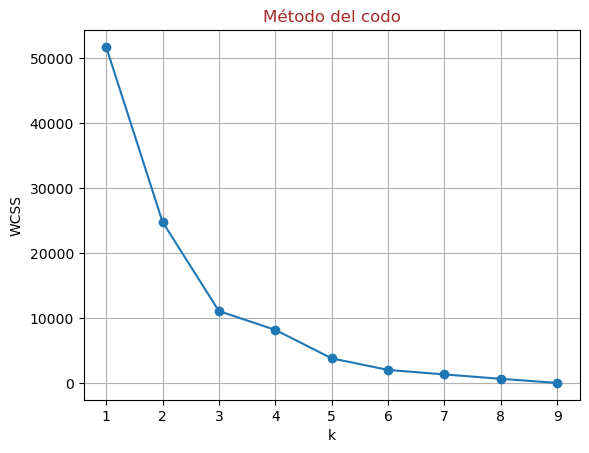

In [8]:
#Método del codo para determinar el K óptimo:
pivote_filled=pivote_clus.fillna(0) #Por protocolo

from sklearn.cluster import KMeans


K = range(1, 10)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pivote_filled)
    inertia.append(kmeans.inertia_)


plt.plot(K, inertia, marker='o')
plt.title('Método del codo', color='brown')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.xticks(K)
plt.grid(True)
plt.show()


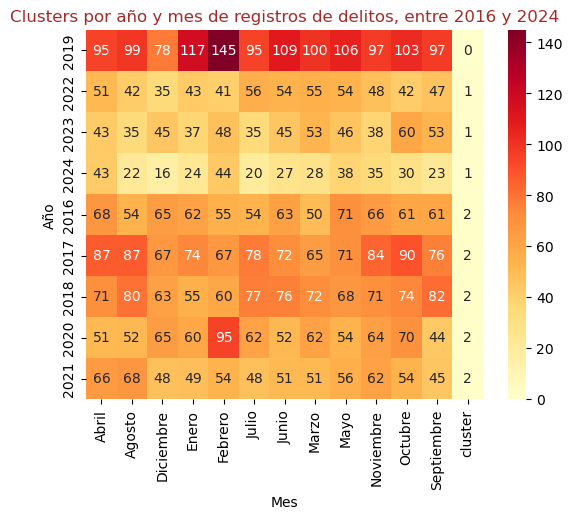

In [9]:
#K óptimo de acuerdo al método del codo:
k_optimo=3

#Definiendo el K-means
kmeans=KMeans(n_clusters=k_optimo, random_state=42)
clusters=kmeans.fit_predict(pivote_filled)

#Mostrando los clusters
pivote_filled['cluster'] = clusters
pivote_ord=pivote_filled.sort_values('cluster')

sns.heatmap(pivote_ord, annot=True, fmt=".0f", cmap="YlOrRd")
plt.title("Clusters por año y mes de registros de delitos, entre 2016 y 2024", color='brown')
plt.xlabel("Mes")
plt.ylabel("Año")
plt.show()

# **3. Análisis del número de carpetas por fechas del hecho:**

In [10]:
print(f'Fecha del hecho más antigua: {df2['fecha_hecho'].min()}')
print(f'Fecha del hecho más reciente: {df2['fecha_hecho'].max()}')
print("-----------------------------------")
print(pd.unique(df2['anio_hecho']))
print("-----------------------------------")

cuentas_delito_añohecho=df2['anio_hecho'].value_counts()
print(f'El número de delitos por año del hecho es: \n \n {cuentas_delito_añohecho}')
print("-----------------------------------")

total_delito_añohecho=cuentas_delito_añohecho.sum() + 5 #5 datos NaN
print(f'El número total de cuentas donde se tiene registrado un año del hecho es: {total_delito_añohecho}')
print("-----------------------------------")

cuentas_16_24=df2_16_24['anio_hecho'].value_counts().sum() 
print(f'El número total de cuentas donde el año del hecho está entre 2016 y 2024 es: {cuentas_16_24}')
print("-----------------------------------")

cuentas_NAN=5
print(f'El número de valores nulos en el año de hecho es: {cuentas_NAN}')
print("-----------------------------------")

porcentaje_16_24=(cuentas_16_24 / total_delito_añohecho)*100
print(f'El porcentaje de datos que se encuentran entre el año del hecho 2016 y 2024 es: {porcentaje_16_24: .2f}%')
print("-----------------------------------")

porcentaje_NAN=(cuentas_NAN/ total_delito_añohecho)*100
print(f'El porcentaje de datos indeterminados en cuanto al año del hecho es: {porcentaje_NAN: .2f}%')
print("-----------------------------------")

porcentaje_75_15_25= 100-porcentaje_16_24-porcentaje_NAN
print(f'El porcentaje de datos que se encuentran entre 1975 a 2015 y en 2025 es: {porcentaje_75_15_25: .2f}%')
print("-----------------------------------")

print(porcentaje_16_24+porcentaje_NAN+porcentaje_75_15_25)

Fecha del hecho más antigua: 1975-01-30 00:00:00
Fecha del hecho más reciente: 2025-01-30 16:20:00
-----------------------------------
<IntegerArray>
[1975, 1995, 1997, 2001, 2004, 2005, 2007, 2009, 2010, 2011, 2012, 2013, 2014,
 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, <NA>]
Length: 25, dtype: Int64
-----------------------------------
El número de delitos por año del hecho es: 
 
 anio_hecho
2019    1241
2017     918
2018     849
2020     731
2016     730
2021     652
2022     568
2023     538
2024     350
2015      29
2025      18
2013       8
2014       6
2011       3
2012       2
2010       2
2005       2
2001       2
1995       1
2009       1
2007       1
2004       1
1997       1
1975       1
Name: count, dtype: Int64
-----------------------------------
El número total de cuentas donde se tiene registrado un año del hecho es: 6660
-----------------------------------
El número total de cuentas donde el año del hecho está entre 2016 y 2024 es: 6577
--------

# **4. Análisis del delito por alcaldía**

La visualización y análisis del delito por alcaldía será de la siguiente manera:

- Parte 4.1: Consiste en determinar y visualizar el número total de registros de delitos contra la libertad personal por alcaldía.
    - Parte 4.1.1: Conclusiones sobre la Parte 4.1
- Parte 4.2: Determinar y visualizar el número total de subtipos del delito entorno a la libertad personal por alcaldía.
    - Parte 4.2.1: Conclusiones sobre la Parte 4.2
- Parte 4.3: Determinar y visualizar la frecuencia de registros del delito en intervalos de una hora en CDMX.
    - Parte 4.3.1: Conclusiones sobre la Parte 4.3
- Parte 4.4: Determinar y visualizar la frecuencia de registros del delito en intervalos de una hora por alcaldía.
    - Parte 4.4.1: Conclusiones sobre la Parte 4.4
 

**Nota: Todo lo anterior se hará considerando las conclusiones en la parte 4 sobre el porcentaje del total de observaciones que ocupa el número de datos de acuerdo al año del hecho.**

In [11]:
print(df2.columns)
print("-----------------------------------")
print(pd.unique(df2['delito']))
print("-----------------------------------")
print(pd.unique(df2['alcaldia_hecho']))
print("-----------------------------------")
total_hechos_alcaldia=df2['alcaldia_hecho'].value_counts()
print(f'El número total de delitos por alcaldía es: \n \n {total_hechos_alcaldia}')

Index(['anio_inicio', 'mes_inicio', 'fecha_inicio', 'fecha_hecho',
       'hora_hecho', 'delito', 'categoria_delito', 'fiscalia', 'agencia',
       'unidad_investigacion', 'colonia_catalogo', 'alcaldia_hecho',
       'anio_hecho', 'mes_hecho'],
      dtype='object')
-----------------------------------
['PRIVACION DE LA LIBERTAD PERSONAL' 'DESAPARICION FORZADA DE PERSONAS'
 'SECUESTRO EXPRESS (PARA COMETER ROBO O EXTORSIÓN)' 'PLAGIO O SECUESTRO'
 'TRAFICO DE INFANTES'
 'PRIVACION DE LA LIBERTAD PERSONAL (REALIZAR ACTO SEXUAL)'
 'PRIVACIÓN DE LA LIBERTAD PERSONAL  ( SI LIBERA DENTRO DE 24 HORAS)'
 'SECUESTRO EXTORSIVO']
-----------------------------------
['ALVARO OBREGON' 'MIGUEL HIDALGO' 'IZTAPALAPA' 'GUSTAVO A. MADERO'
 'CUAUHTEMOC' 'AZCAPOTZALCO' 'VENUSTIANO CARRANZA' 'TLALPAN' 'COYOACAN'
 'BENITO JUAREZ' 'CUAJIMALPA DE MORELOS' 'XOCHIMILCO'
 'LA MAGDALENA CONTRERAS' 'MILPA ALTA' 'TLAHUAC' 'IZTACALCO']
-----------------------------------
El número total de delitos por alcaldía es: 
 

### **4.1 Delitos sobre la libertad personal por alcaldía:**

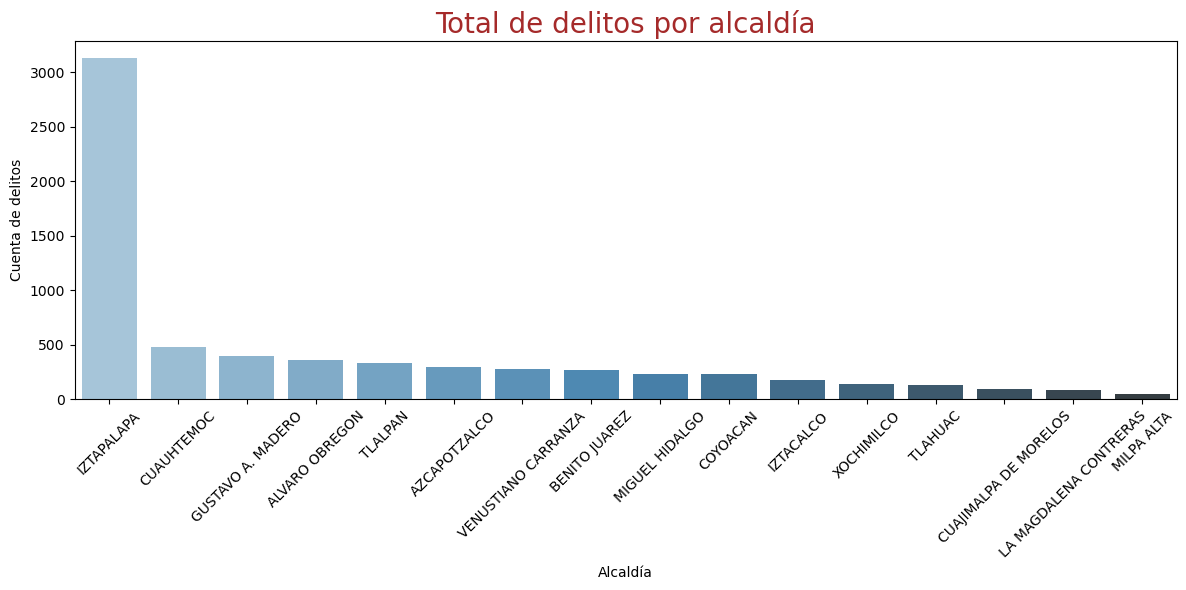

In [12]:
df_general_alcaldia=total_hechos_alcaldia.reset_index()
df_general_alcaldia.columns=['alcaldia', 'total_hechos']

plt.figure(figsize=(12, 6))
sns.barplot(data=df_general_alcaldia, x='alcaldia', y='total_hechos', palette='Blues_d')
plt.title('Total de delitos por alcaldía', color='brown', fontsize=20)
plt.xlabel('Alcaldía')
plt.ylabel('Cuenta de delitos')
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()

### **4.1.1 Conclusión del análisis general de los registros del delito por alcaldía:**

In [13]:
total_hechos_alcaldia=df2['alcaldia_hecho'].value_counts()
print(f'El número total de delitos por alcaldía es: \n \n {total_hechos_alcaldia}')

El número total de delitos por alcaldía es: 
 
 alcaldia_hecho
IZTAPALAPA                3125
CUAUHTEMOC                 477
GUSTAVO A. MADERO          393
ALVARO OBREGON             362
TLALPAN                    329
AZCAPOTZALCO               299
VENUSTIANO CARRANZA        277
BENITO JUAREZ              263
MIGUEL HIDALGO             234
COYOACAN                   231
IZTACALCO                  178
XOCHIMILCO                 139
TLAHUAC                    134
CUAJIMALPA DE MORELOS       92
LA MAGDALENA CONTRERAS      81
MILPA ALTA                  46
Name: count, dtype: int64


### **4.2 Subtipos del delito entorno a la libertad personal por alcaldía:**

In [14]:
#Valores de la columna 'alcaldia_hecho'
lista_alcaldias=['ALVARO OBREGON', 
                  'AZCAPOTZALCO',
                  'BENITO JUAREZ', 
                  'COYOACAN',
                  'CUAJIMALPA DE MORELOS', 
                  'CUAUHTEMOC',
                  'GUSTAVO A. MADERO',
                  'IZTACALCO',
                  'IZTAPALAPA',
                  'LA MAGDALENA CONTRERAS',
                  'MIGUEL HIDALGO',
                  'MILPA ALTA',
                  'TLAHUAC',
                  'TLALPAN',
                  'VENUSTIANO CARRANZA', 'XOCHIMILCO']

#Ciclo for para asignar un dataframe y un barplot a cada una de las 16 alcaldías
for alcaldia in lista_alcaldias:
    df_alcaldia=df2[df2['alcaldia_hecho'] == alcaldia]
    df_delitos=df_alcaldia['delito'].value_counts().reset_index()
    df_delitos.columns = ['delito', 'conteo']
    
    #Con Plotly Express:
    fig=px.bar(df_delitos, 
                 x='conteo', 
                 y='delito', 
                 orientation='h',
                 title=f'Cuenta de delitos hacia la libertad personal en {alcaldia}',
                 labels={'conteo': 'Número de delitos', 'delito': 'Tipo de delito'})
    
    fig.update_layout(yaxis={'categoryorder':'total ascending'})
    
    fig.show()

#Seaborn:
#for alcaldia in lista_alcaldias: 
#    df_general_alcaldia=df2[df2['alcaldia_hecho'] == alcaldia]
#    plt.figure(figsize=(10,6))
#    sns.countplot(data=df_general_alcaldia, y='delito', order=df_general_alcaldia['delito'].value_counts().index)
#    plt.title(f'Cuenta de delitos hacia la libertad personal en {alcaldia}')
#    plt.xlabel('Número de delitos')
#    plt.ylabel('Tipo de delito')
#    plt.tight_layout()
#    plt.show()

### **4.2.1 Conclusión del análisis de los registros de subtipos del delito por alcaldía:**

In [15]:
#Estadísticas de cada alcaldía de acuerdo al subtipo de delito
for alcaldia in lista_alcaldias:
    df_alcaldia=df2[df2['alcaldia_hecho'] == alcaldia]
    df_delitos=df_alcaldia['delito'].value_counts().reset_index()
    print("-----------------------------------")
    print(f'El número total de subtipos de delito cometidos en la alcaldía {alcaldia} es: \n {df_delitos}')

-----------------------------------
El número total de subtipos de delito cometidos en la alcaldía ALVARO OBREGON es: 
                                               delito  count
0                  PRIVACION DE LA LIBERTAD PERSONAL    210
1  SECUESTRO EXPRESS (PARA COMETER ROBO O EXTORSIÓN)    131
2                   DESAPARICION FORZADA DE PERSONAS     12
3                                 PLAGIO O SECUESTRO      6
4  PRIVACION DE LA LIBERTAD PERSONAL (REALIZAR AC...      2
5                                TRAFICO DE INFANTES      1
-----------------------------------
El número total de subtipos de delito cometidos en la alcaldía AZCAPOTZALCO es: 
                                               delito  count
0                  PRIVACION DE LA LIBERTAD PERSONAL    191
1  SECUESTRO EXPRESS (PARA COMETER ROBO O EXTORSIÓN)     97
2                   DESAPARICION FORZADA DE PERSONAS     11
-----------------------------------
El número total de subtipos de delito cometidos en la alcaldía BEN

In [16]:
#Alcaldía más peligrosa de acuerdo al tipo de delito
df_subtipos_cuenta=df2.groupby(['delito', 'alcaldia_hecho']).size().reset_index(name='cuentas')

for delito in df_subtipos_cuenta['delito'].unique():
    df_sub=df_subtipos_cuenta[df_subtipos_cuenta['delito'] == delito].sort_values(by='cuentas', ascending=False)
    alcaldia_cuenta=df_sub.iloc[0]
    print("-----------------------------------")
    print(f"Subtipo de delito: {delito}")
    print(f"Alcaldía con más casos: {alcaldia_cuenta['alcaldia_hecho']} ({alcaldia_cuenta['cuentas']} casos)")

-----------------------------------
Subtipo de delito: DESAPARICION FORZADA DE PERSONAS
Alcaldía con más casos: CUAUHTEMOC (19 casos)
-----------------------------------
Subtipo de delito: PLAGIO O SECUESTRO
Alcaldía con más casos: IZTAPALAPA (197 casos)
-----------------------------------
Subtipo de delito: PRIVACION DE LA LIBERTAD PERSONAL
Alcaldía con más casos: IZTAPALAPA (2567 casos)
-----------------------------------
Subtipo de delito: PRIVACION DE LA LIBERTAD PERSONAL (REALIZAR ACTO SEXUAL)
Alcaldía con más casos: IZTAPALAPA (12 casos)
-----------------------------------
Subtipo de delito: PRIVACIÓN DE LA LIBERTAD PERSONAL  ( SI LIBERA DENTRO DE 24 HORAS)
Alcaldía con más casos: IZTAPALAPA (2 casos)
-----------------------------------
Subtipo de delito: SECUESTRO EXPRESS (PARA COMETER ROBO O EXTORSIÓN)
Alcaldía con más casos: IZTAPALAPA (325 casos)
-----------------------------------
Subtipo de delito: SECUESTRO EXTORSIVO
Alcaldía con más casos: IZTAPALAPA (9 casos)
-----------

### **4.3 Intervalos por hora asociados a las ocurrencias del delito en CDMX**

In [17]:
#Manejo de valores NaT: Vamos a eliminarlos en esta parte del análisis para definir los intervalos de tiempo adecuadamente.
#Al ser cuatro valores únicamente, anteriormente vimos que representa menos del 0.08% de los registros que se tienen, por lo que no será mucho problema dropearlos.

df_hora_delito=df2.dropna(subset=['hora_hecho'])
print(df_hora_delito.isna().sum())
print("-----------------------------------")
display(df_hora_delito.head(2))

anio_inicio               0
mes_inicio                0
fecha_inicio              1
fecha_hecho               1
hora_hecho                0
delito                    0
categoria_delito          0
fiscalia                  1
agencia                   0
unidad_investigacion      2
colonia_catalogo        530
alcaldia_hecho            0
anio_hecho                1
mes_hecho                 1
dtype: int64
-----------------------------------


anio_inicio mes_inicio fecha_inicio fecha_hecho hora_hecho  \
0         2024     Agosto   2024-08-31  1975-01-30   06:00:00   
1         2023      Enero   2023-01-20  1995-10-01   16:30:00   

                              delito        categoria_delito  \
0  PRIVACION DE LA LIBERTAD PERSONAL  DELITO DE BAJO IMPACTO   
1  PRIVACION DE LA LIBERTAD PERSONAL  DELITO DE BAJO IMPACTO   

                                            fiscalia   agencia  \
0  FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN ALVAR...  UAT-AO-4   
1  FISCALÍA DE INVESTIGACIÓN Y PERSECUCIÓN DE LOS...         B   

  unidad_investigacion                 colonia_catalogo  alcaldia_hecho  \
0               UI-1SD                        San Angel  ALVARO OBREGON   
1       2 SIN DETENIDO  Bosque De Chapultepec I Seccion  MIGUEL HIDALGO   

   anio_hecho mes_hecho  
0        1975     Enero  
1        1995   Octubre

In [18]:
#Creación de columna intervalo
df_hora_delito['intervalo_hora']=df_hora_delito['hora_hecho'].str[:2]
print(df_hora_delito.dtypes)
print("-----------------------------------")
print(df_hora_delito.columns)
print("-----------------------------------")
display(df_hora_delito.tail(2))

anio_inicio                      int64
mes_inicio                      object
fecha_inicio            datetime64[ns]
fecha_hecho             datetime64[ns]
hora_hecho                      object
delito                          object
categoria_delito                object
fiscalia                        object
agencia                         object
unidad_investigacion            object
colonia_catalogo                object
alcaldia_hecho                  object
anio_hecho                       Int64
mes_hecho                       object
intervalo_hora                  object
dtype: object
-----------------------------------
Index(['anio_inicio', 'mes_inicio', 'fecha_inicio', 'fecha_hecho',
       'hora_hecho', 'delito', 'categoria_delito', 'fiscalia', 'agencia',
       'unidad_investigacion', 'colonia_catalogo', 'alcaldia_hecho',
       'anio_hecho', 'mes_hecho', 'intervalo_hora'],
      dtype='object')
-----------------------------------


anio_inicio mes_inicio        fecha_inicio         fecha_hecho  \
6654         2025      Enero 2025-01-30 20:42:57 2025-01-30 16:20:00   
6659         2024  Diciembre 2024-12-20 16:27:50                 NaT   

       hora_hecho                             delito        categoria_delito  \
6654  16:20:00:00  PRIVACION DE LA LIBERTAD PERSONAL  DELITO DE BAJO IMPACTO   
6659       NaT:00  PRIVACION DE LA LIBERTAD PERSONAL  DELITO DE BAJO IMPACTO   

                                               fiscalia agencia  \
6654  FISCALÍA DE INVESTIGACIÓN DEL DELITO DE SECUESTRO       A   
6659  FISCALÍA DE INVESTIGACIÓN DEL DELITO DE SECUESTRO       E   

      unidad_investigacion colonia_catalogo alcaldia_hecho  anio_hecho  \
6654              Unidad 2       Roma Norte     CUAUHTEMOC        2025   
6659  3 CON DETENIDO 3 C/D              NaN     IZTAPALAPA        <NA>   

     mes_hecho intervalo_hora  
6654     Enero             16  
6659       NaN             Na

In [19]:
#Columna intervalo a entero, manejando el valor NaT:00 que Pandas manda al final:
df_hora_delito['intervalo_hora'] = pd.to_numeric(df_hora_delito['hora_hecho'].str[:2],errors='coerce').astype('Int64')
display(df_hora_delito.head(2))
print("-----------------------------------")
print(df_hora_delito.dtypes)

anio_inicio mes_inicio fecha_inicio fecha_hecho hora_hecho  \
0         2024     Agosto   2024-08-31  1975-01-30   06:00:00   
1         2023      Enero   2023-01-20  1995-10-01   16:30:00   

                              delito        categoria_delito  \
0  PRIVACION DE LA LIBERTAD PERSONAL  DELITO DE BAJO IMPACTO   
1  PRIVACION DE LA LIBERTAD PERSONAL  DELITO DE BAJO IMPACTO   

                                            fiscalia   agencia  \
0  FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN ALVAR...  UAT-AO-4   
1  FISCALÍA DE INVESTIGACIÓN Y PERSECUCIÓN DE LOS...         B   

  unidad_investigacion                 colonia_catalogo  alcaldia_hecho  \
0               UI-1SD                        San Angel  ALVARO OBREGON   
1       2 SIN DETENIDO  Bosque De Chapultepec I Seccion  MIGUEL HIDALGO   

   anio_hecho mes_hecho  intervalo_hora  
0        1975     Enero               6  
1        1995   Octubre              16

-----------------------------------
anio_inicio                      int64
mes_inicio                      object
fecha_inicio            datetime64[ns]
fecha_hecho             datetime64[ns]
hora_hecho                      object
delito                          object
categoria_delito                object
fiscalia                        object
agencia                         object
unidad_investigacion            object
colonia_catalogo                object
alcaldia_hecho                  object
anio_hecho                       Int64
mes_hecho                       object
intervalo_hora                   Int64
dtype: object


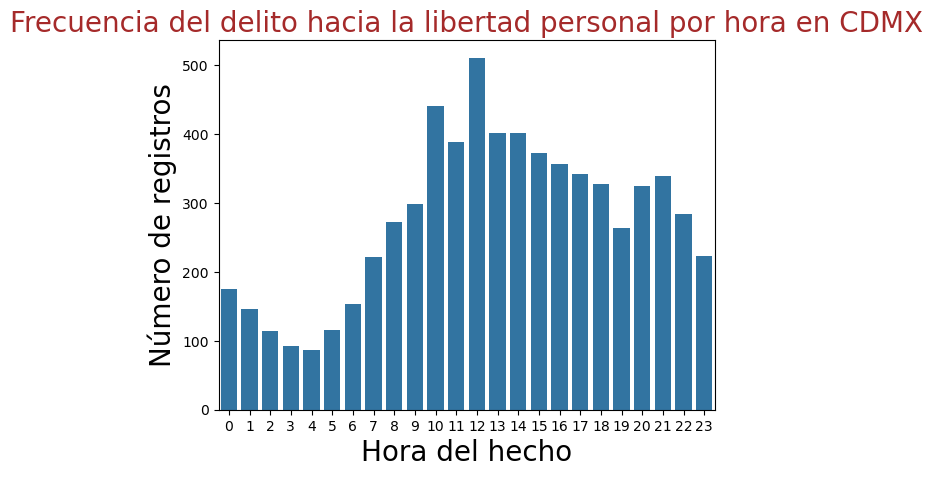

In [20]:
sns.countplot(data=df_hora_delito, x='intervalo_hora')
plt.title("Frecuencia del delito hacia la libertad personal por hora en CDMX", fontsize = 20, color="brown")
plt.xlabel('Hora del hecho', fontsize = 20)
plt.ylabel('Número de registros', fontsize = 20)
plt.show()

### **4.3.1 Conclusión del análisis por intervalos de horas asociados a las ocurrencias del delito en CDMX:**

In [21]:
#Conclusiones del gráfico anterior:
print(df_hora_delito.groupby("intervalo_hora")["delito"].count())

intervalo_hora
0     175
1     146
2     115
3      92
4      86
5     116
6     154
7     221
8     273
9     299
10    441
11    389
12    511
13    401
14    402
15    373
16    356
17    342
18    327
19    264
20    325
21    340
22    284
23    223
Name: delito, dtype: int64


### **4.4 Intervalos por hora asociados a las ocurrencias del delito por alcaldía** 

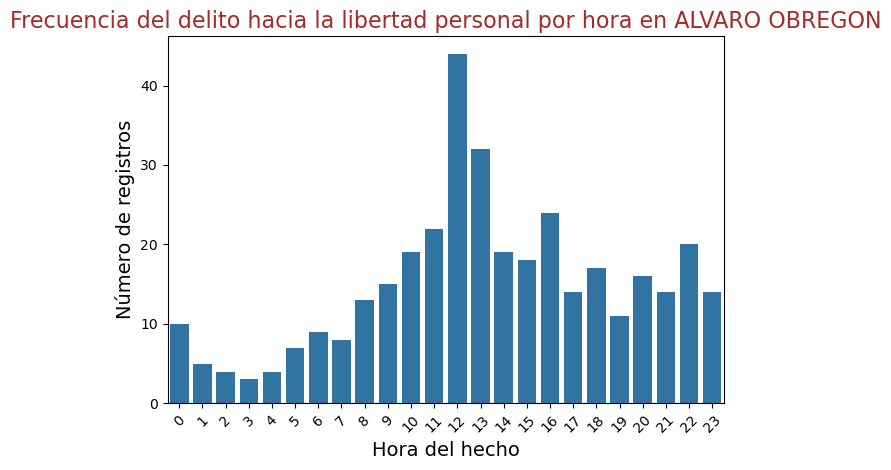

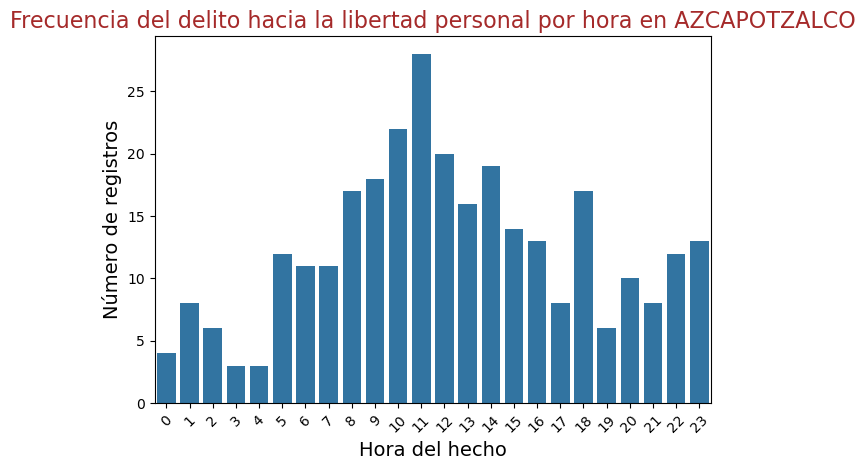

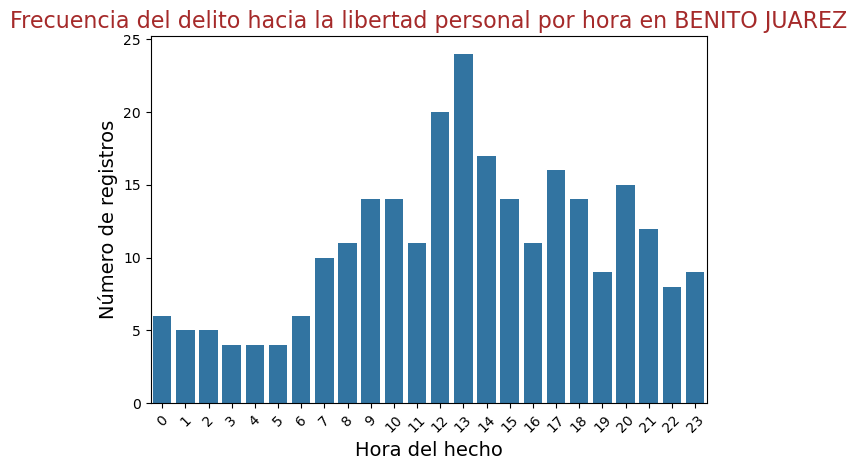

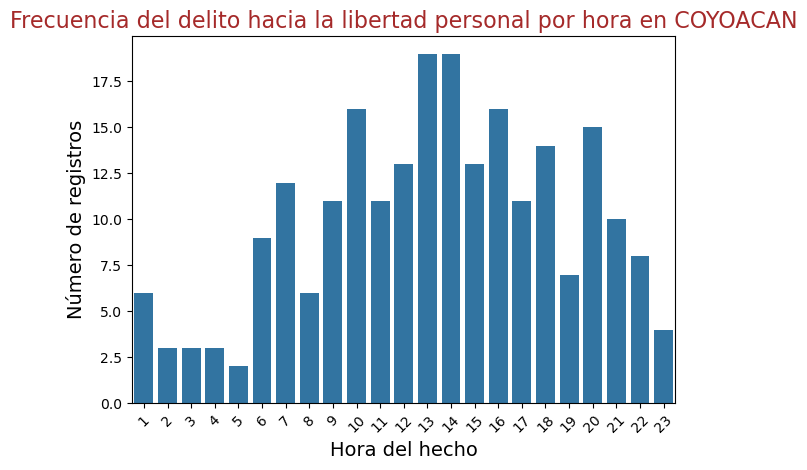

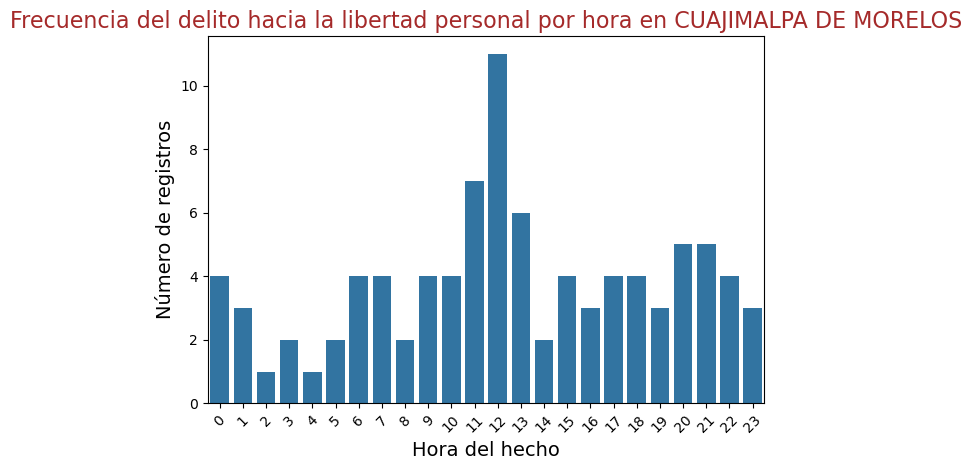

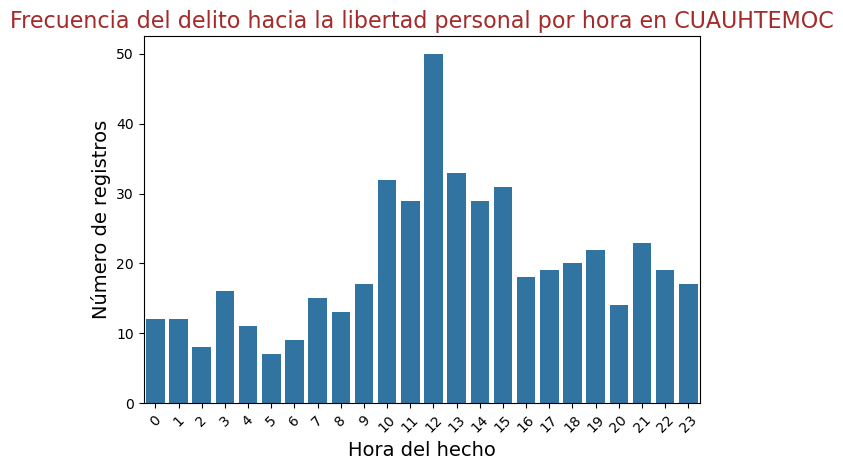

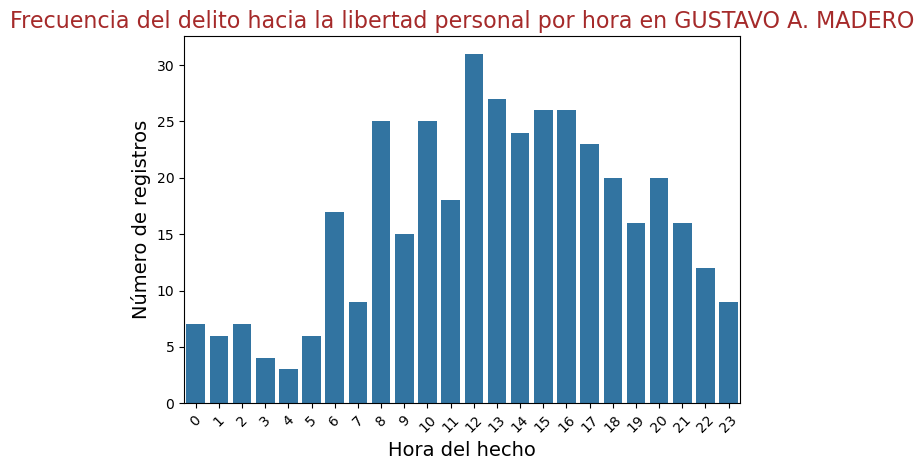

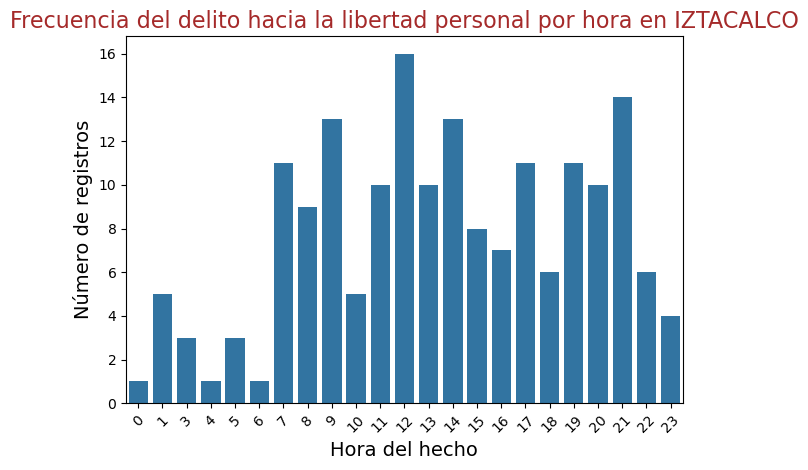

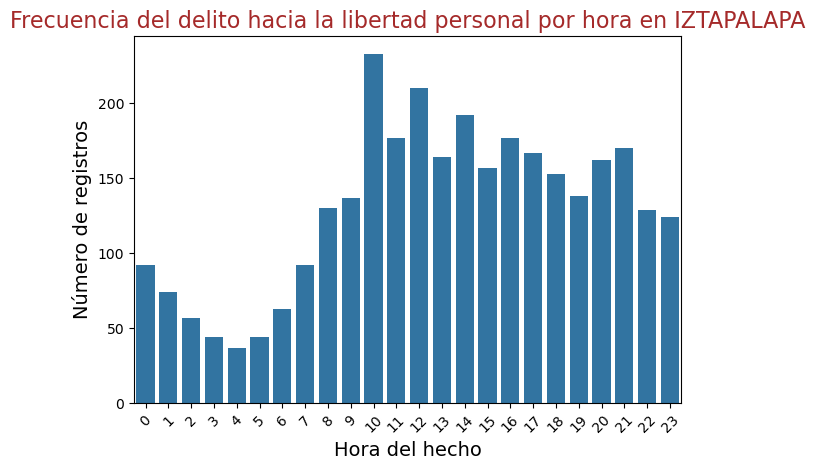

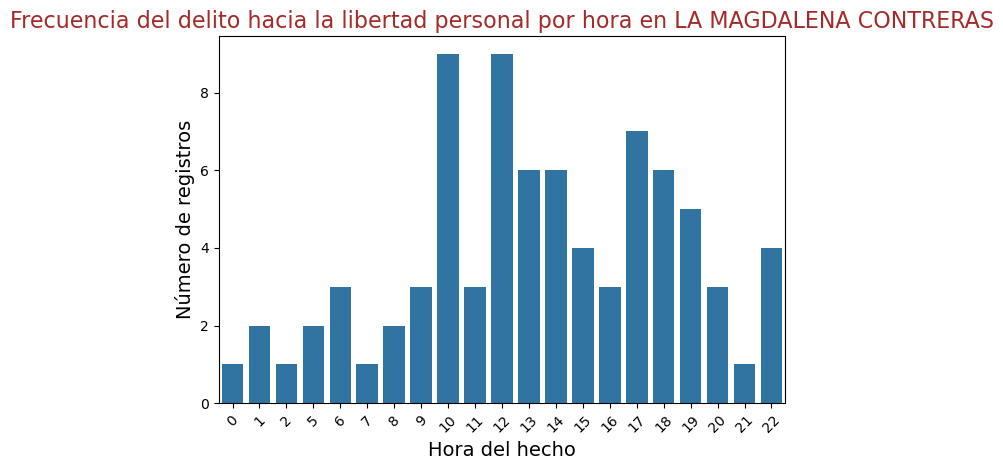

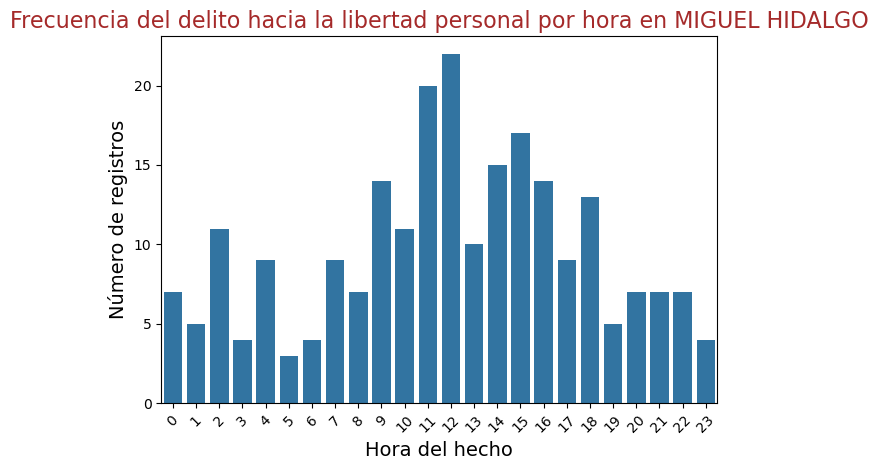

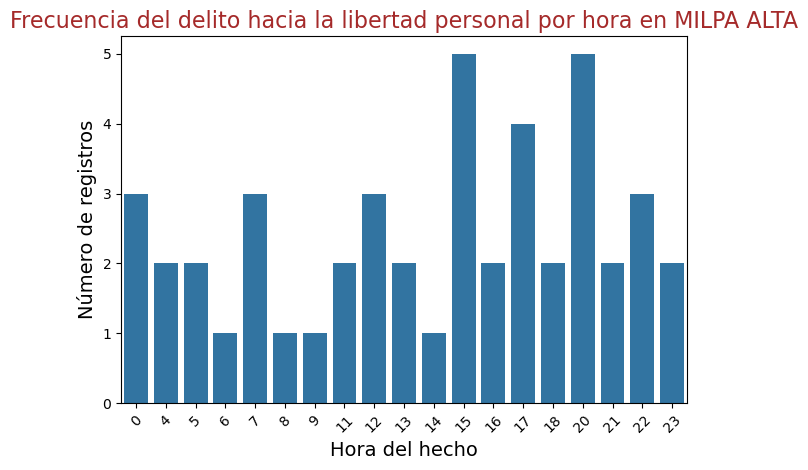

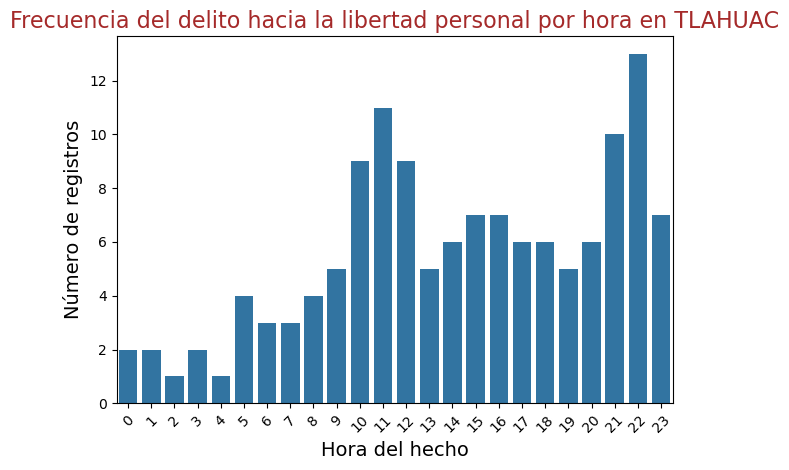

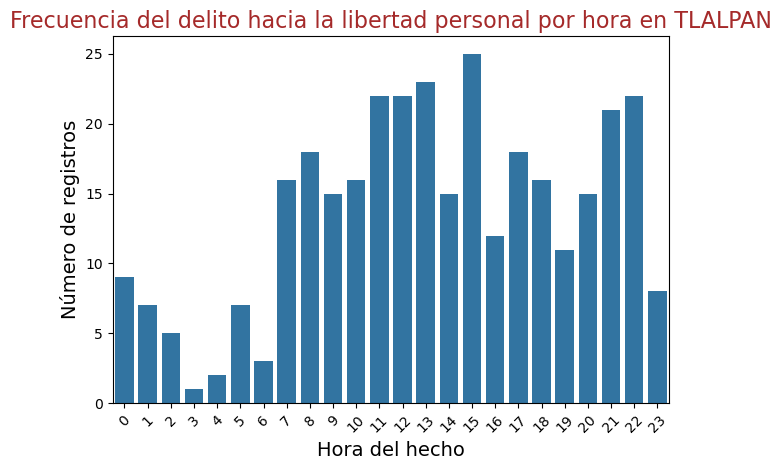

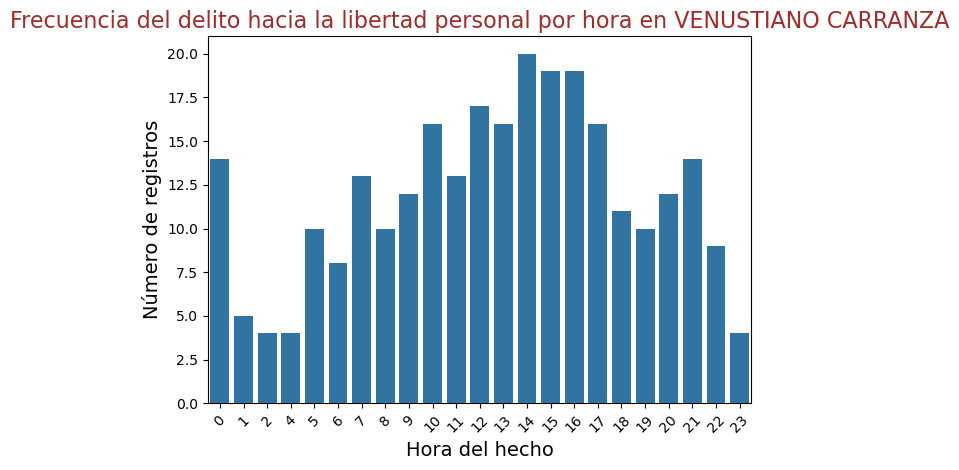

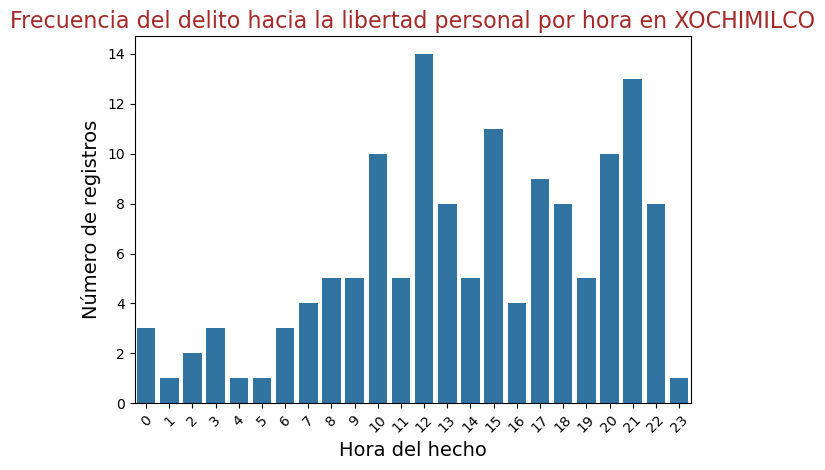

In [22]:
#Sin valores NaN
df_hora_delito=df_hora_delito[df_hora_delito['intervalo_hora'].notna()]

for alcaldia in lista_alcaldias:
    df_filtrado=df_hora_delito[df_hora_delito['alcaldia_hecho'] == alcaldia]
    
    sns.countplot(data=df_filtrado, x='intervalo_hora', order=sorted(df_filtrado['intervalo_hora'].unique()))
    plt.title(f"Frecuencia del delito hacia la libertad personal por hora en {alcaldia}", fontsize=16, color="brown")
    plt.xlabel('Hora del hecho', fontsize=14)
    plt.ylabel('Número de registros', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### **4.4.1 Conclusión del análisis de intervalos de horas asociados a las ocurrencias del delito por alcaldía** 

In [23]:
for alcaldia in lista_alcaldias:
    df_alcaldia=df_hora_delito[df_hora_delito['alcaldia_hecho'] == alcaldia]
    df_delitos=df_alcaldia['intervalo_hora'].value_counts().reset_index()
    print("-----------------------------------")
    print(f'El número total de registros de delito por intervalos de hora cometidos en la alcaldía {alcaldia} es: \n {df_delitos}')

-----------------------------------
El número total de registros de delito por intervalos de hora cometidos en la alcaldía ALVARO OBREGON es: 
     intervalo_hora  count
0               12     44
1               13     32
2               16     24
3               11     22
4               22     20
5               10     19
6               14     19
7               15     18
8               18     17
9               20     16
10               9     15
11              21     14
12              17     14
13              23     14
14               8     13
15              19     11
16               0     10
17               6      9
18               7      8
19               5      7
20               1      5
21               4      4
22               2      4
23               3      3
-----------------------------------
El número total de registros de delito por intervalos de hora cometidos en la alcaldía AZCAPOTZALCO es: 
     intervalo_hora  count
0               11     28
1           

In [24]:
for alcaldia in lista_alcaldias:
    df_alcaldia=df_hora_delito[df_hora_delito['alcaldia_hecho'] == alcaldia]
    df_delitos=df_alcaldia['intervalo_hora'].value_counts().reset_index()
    df_delitos.columns=['intervalo_hora', 'num_delitos'] 
    
    max_delitos=df_delitos['num_delitos'].max()  
    intervalos_maximos=df_delitos[df_delitos['num_delitos'] == max_delitos]  
    
    print("-----------------------------------")
    print(f'La(s) hora(s) con mayor número de registros de delito en la alcaldía {alcaldia} es (son): \n {intervalos_maximos}')

-----------------------------------
La(s) hora(s) con mayor número de registros de delito en la alcaldía ALVARO OBREGON es (son): 
    intervalo_hora  num_delitos
0              12           44
-----------------------------------
La(s) hora(s) con mayor número de registros de delito en la alcaldía AZCAPOTZALCO es (son): 
    intervalo_hora  num_delitos
0              11           28
-----------------------------------
La(s) hora(s) con mayor número de registros de delito en la alcaldía BENITO JUAREZ es (son): 
    intervalo_hora  num_delitos
0              13           24
-----------------------------------
La(s) hora(s) con mayor número de registros de delito en la alcaldía COYOACAN es (son): 
    intervalo_hora  num_delitos
0              13           19
1              14           19
-----------------------------------
La(s) hora(s) con mayor número de registros de delito en la alcaldía CUAJIMALPA DE MORELOS es (son): 
    intervalo_hora  num_delitos
0              12           11
-